In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Loading the dataset Admission_Prediction.csv
df=pd.read_csv(r"C:\Users\Aman\Downloads\Admission_Prediction.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [4]:
def missing_values_impute(df):
    for i in df:
        if df[i].dtypes=='O':
            mode=df[i].mode()[0]
            df[i].fillna(mode,inplace=True)
        else:
            median=df[i].median()
            df[i].fillna(median,inplace=True)

In [5]:
missing_values_impute(df)

In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
# Droppping the serial column
df.drop(columns='Serial No.',inplace=True)

### EDA 

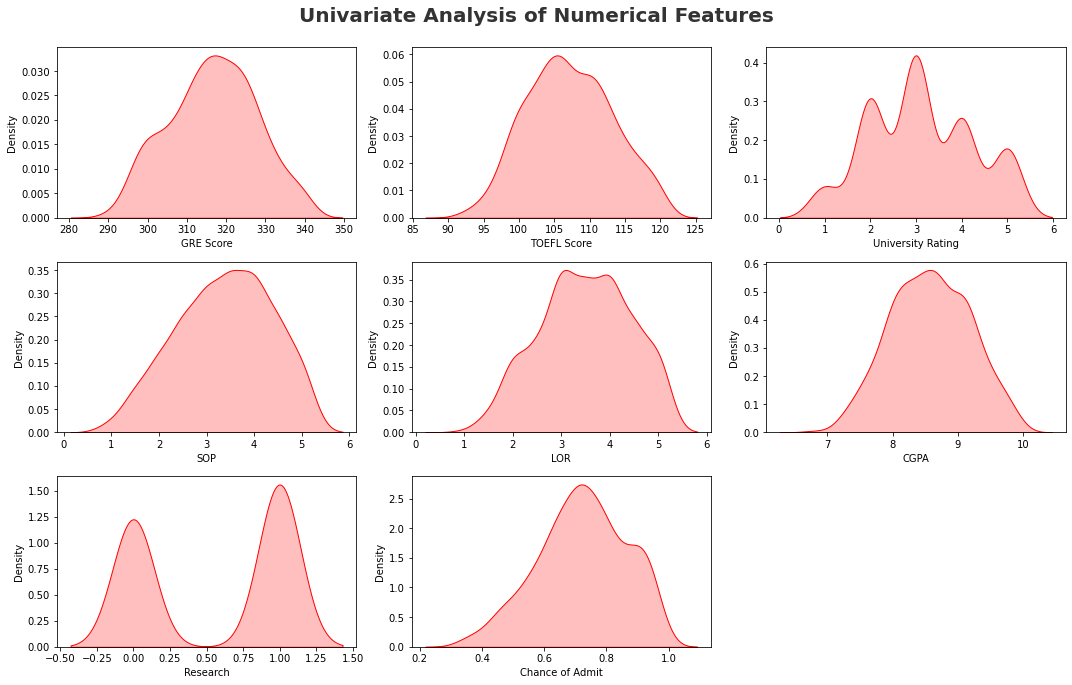

In [8]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for j,i in enumerate(df):
    plt.subplot(5,3,j+1)
    sns.kdeplot(x=df[i],shade=True, color='r')
    plt.tight_layout()

In [9]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [10]:
# Observation :- Research column is a binomially distributed
# GRE Score,TOEFL Score,SOP, LOR, CGPA are approximately Gaussianly distributed

In [11]:
df["Research"].value_counts()

1    280
0    220
Name: Research, dtype: int64

### Bivariate

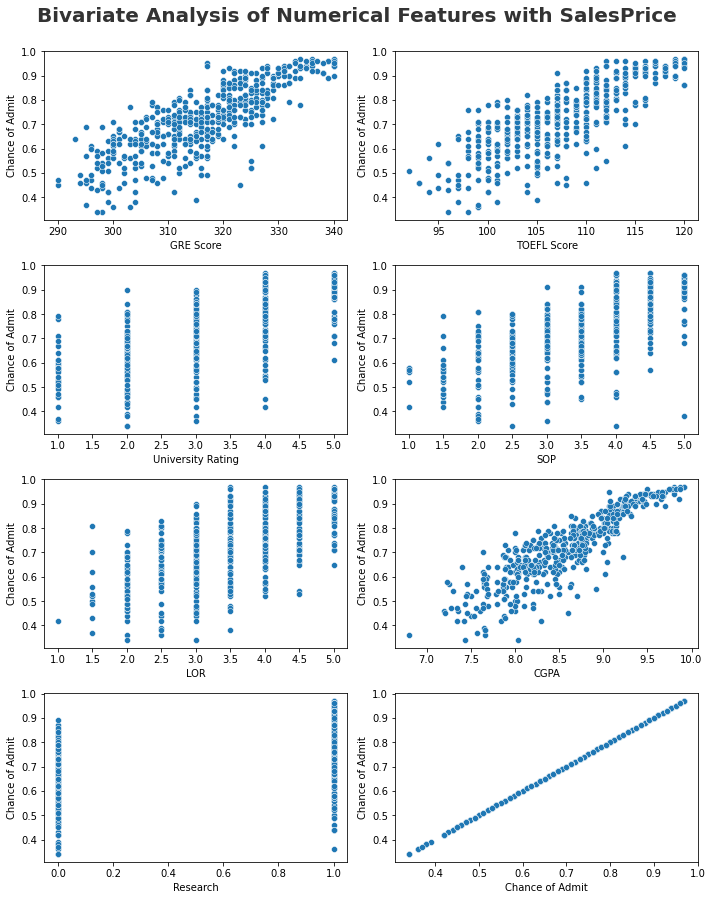

In [12]:
plt.figure(figsize=(10, 15))
plt.suptitle('Bivariate Analysis of Numerical Features with SalesPrice', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
columns=df.columns
for i in range(0, len(columns)):
    plt.subplot(5, 2, i+1)
    sns.scatterplot(x=df[columns[i]],y=df["Chance of Admit"],palette="deep")
    plt.tight_layout()

#### Multivariate 

In [13]:
df.corr().T

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.819885,0.623467,0.608349,0.528105,0.818344,0.544756,0.802321
TOEFL Score,0.819885,1.000000,0.644189,0.642976,0.535500,0.805547,0.464858,0.786543
University Rating,0.623467,0.644189,1.000000,0.713657,0.606949,0.697704,0.424966,0.681482
SOP,0.608349,0.642976,0.713657,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.528105,0.535500,0.606949,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.818344,0.805547,0.697704,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.544756,0.464858,0.424966,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.802321,0.786543,0.681482,0.684137,0.645365,0.882413,0.545871,1.000000


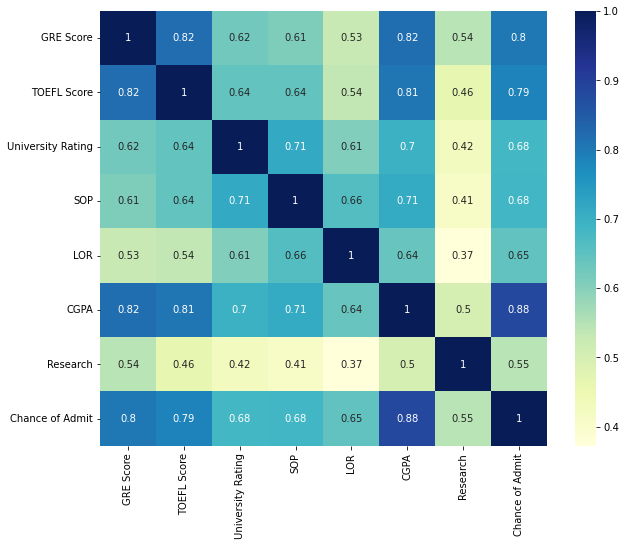

In [14]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")
plt.show()

In [15]:
# Feature columns are
X=df.drop(columns=['Chance of Admit'])

In [16]:
# Target variable (dependent feature)
y=df['Chance of Admit']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=100)

In [18]:
scale=StandardScaler()

In [19]:
X_train=pd.DataFrame(scale.fit_transform(X_train),columns=X_train.columns)

In [20]:
X_test=pd.DataFrame(scale.transform(X_test),columns=X_test.columns)

In [21]:
# Model Bulding

In [22]:
svr=SVR(C= 1, cache_size= 200, coef0= 0.0, epsilon= 0.001, gamma= 0.001, kernel= 'linear', shrinking= False, tol= 0.0001)

In [23]:
# param={
#     "C":[1,2,3],
#     "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
#     "gamma":[0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
#     "coef0":[0.0,0.1,0.2],
#     "shrinking":[False,True],
#     "epsilon":[0.001,0.1,0.2,0.3,0.4,0.5,0.6],
#     "tol":[0.0001,0.001,0.002,0.003,0.004,0.005,0.006],
#     "cache_size":[200,300,400,500]
# }

In [24]:
# gscv=GridSearchCV(estimator=svr, param_grid=param)
# gscv.fit(X_train,y_train)

#### With Hyper parameter tunning

In [25]:
svr.fit(X_train,y_train)

SVR(C=1, epsilon=0.001, gamma=0.001, kernel='linear', shrinking=False,
    tol=0.0001)

In [26]:
svr.score(X_train,y_train)

0.8076317370166927

In [27]:
svr.score(X_test,y_test)

0.8394931569696722

In [28]:
pred=svr.predict(X_test)

In [29]:
def adjusted_r2(x,y):
    r2=svr.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adj_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [30]:
adjusted_r2(X_test,y_test)

0.8298901834550372

### Without Hyper parameter tunning

In [31]:
sv=SVR()
sv.fit(X_train,y_train)

SVR()

In [32]:
sv.score(X_test,y_test)

0.6784563936705421

In [33]:
print('Mean abolute error is:', mean_absolute_error(y_test,pred))
print('Mean squared error is:', mean_squared_error(y_test,pred))
print('Root mean squared error is:', np.sqrt(mean_squared_error(y_test,pred)))

Mean abolute error is: 0.04144106280479099
Mean squared error is: 0.003144070703149579
Root mean squared error is: 0.05607201354641707


#### Linear Regression

In [34]:
lin_reg = LinearRegression()

In [35]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [36]:
lin_reg.score(X_test,y_test)

0.8261583882086821

In [37]:
y_pread=lin_reg.predict(X_test)

In [38]:
print('Mean abolute error is:', mean_absolute_error(y_test,y_pread))
print('Mean squared error is:', mean_squared_error(y_test,y_pread))
print('Root mean squared error is:', np.sqrt(mean_squared_error(y_test,y_pread)))

Mean abolute error is: 0.045790372721147034
Mean squared error is: 0.0034052773595335765
Root mean squared error is: 0.058354754386712795


In [39]:
# Creating a function for adjusted R-square
def adjusted_r2(x,y):
    r2=lin_reg.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adj_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [40]:
adjusted_r2(X_test,y_test)

0.8157576080160391

In [41]:
elastic_net=ElasticNetCV(alphas=np.random.uniform(0,10,20),cv=20)

In [42]:
elastic_net.fit(X_train,y_train)

ElasticNetCV(alphas=array([7.72368519, 9.29295257, 8.50719964, 1.79082648, 0.59702225,
       0.53140197, 0.28437129, 1.4610157 , 0.14671011, 6.14447451,
       7.38751058, 6.73711988, 2.21049618, 7.59281885, 9.87514591,
       1.90289153, 7.39593783, 4.96918499, 6.37858028, 6.87772703]),
             cv=20)

In [43]:
elastic_net.alpha_

0.14671011456413252

In [44]:
elastic=ElasticNet(alpha=elastic_net.alpha_)

In [45]:
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.14671011456413252)

In [46]:
elastic.score(X_test,y_test)

0.5208512926880091

### Decision Tree Regressor 

In [62]:
dt=DecisionTreeRegressor(criterion='squared_error')

In [63]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [64]:
dt.score(X_test,y_test)

0.6104631445368782

In [50]:
def adjusted_r2(x,y):
    r2=dt.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adj_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [51]:
adjusted_r2(X_test,y_test)

0.5881097679844758

In [88]:
path=dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha=path['ccp_alphas']
dt_model=[]
for ccp in ccp_alpha:
    dt_m=DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(X1,y1)
    dt_model2.append(dt_m)
train_score=[i.score(X1,y1) for i in dt_model2]
test_score=[i.score(X_test,y_test) for i in dt_model2]

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",drawstyle="steps-post")
ax.legend()

In [52]:
# params={
#     'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson"],
#     'splitter':["best", "random"],
#     'max_depth':[1,2,5,7,10,13,15,17,20,23],
#     'min_samples_split':[2,4,7,9,12,15,17,21],
#     'min_samples_leaf':[1,3,5,8,10,13,16,18,20],
#     'min_weight_fraction_leaf':[0.0,0.1,0.4,0.6,0.8,0.9],
#     'max_features':["auto", "sqrt", "log2"],
#     'random_state':[33,90,100],
#     'max_leaf_nodes':[2,4,6,8,10,15,20],
#     'min_impurity_decrease':[0.1,0.3,0.5,0.6,0.9],
#     'ccp_alpha':[ 1.77777778e-07, 2.00000000e-07,3.20000000e-07, 4.00000000e-07, 5.33333333e-07, 7.11111111e-07,6.85941043e-05]
# }

In [53]:
# gddt=GridSearchCV(estimator=dt,param_grid=params,cv=1000,scoring="r2")

In [54]:
# import sklearn.metrics

In [55]:
# sklearn.metrics.SCORERS.keys()